In [2]:
import numpy as np
import scipy.interpolate
from scipy import interpolate
import math
import matplotlib.pyplot as plt
import subprocess
from astropy.io import fits
from subprocess import Popen, PIPE
from mpl_toolkits.mplot3d import axes3d
from numpy import cos,sin

%matplotlib inline


In [3]:
spin=0.5;
d1=0;
E=0.95;
L=3.19;
cos(np.pi)

-1.0

In [233]:
#geo8RK4
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt('C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.2f_d1%.2f_E%.2f_Lz%.2f.dat'%(spin,d1,E,L),unpack=True)

In [234]:
#qseudo_flat spacetime
x=[];
y=[];
z=[];
t_tau_dot=[]
z_tau_dot=[]
y_tau_dot=[]
x_tau_dot=[]
z_t_dot=[]
y_t_dot=[]
x_t_dot=[]
vr_tau_dot=[]
vth_tau_dot=[]
vphi_tau_dot=[]
vx_tau_dot=[]
vy_tau_dot=[]
vz_tau_dot=[]
x_t_2dot=[]
y_t_2dot=[]
z_t_2dot=[]


for i in np.arange(index.size):
    x.append(r[i]*np.sin(th[i])*np.cos(phi[i]));
    y.append(r[i]*np.sin(th[i])*np.sin(phi[i]));
    z.append(r[i]*np.cos(th[i]));
    t_tau_dot.append(ut[i])
    x_tau_dot.append(ur[i]*np.sin(th[i])*np.cos(phi[i]) + r[i]*np.cos(th[i])*np.cos(phi[i])*uth[i] - r[i]*np.sin(th[i])*np.sin(phi[i])*uphi[i] )
    y_tau_dot.append(ur[i]*np.sin(th[i])*np.sin(phi[i]) + r[i]*np.cos(th[i])*np.sin(phi[i])*uth[i] + r[i]*np.sin(th[i])*np.cos(phi[i])*uphi[i] )
    z_tau_dot.append(ur[i]*np.cos(th[i]) - r[i]*np.sin(th[i])*uth[i])
    x_t_dot.append(x_tau_dot[i]/t_tau_dot[i])
    y_t_dot.append(y_tau_dot[i]/t_tau_dot[i])
    z_t_dot.append(z_tau_dot[i]/t_tau_dot[i])
    
    vr_tau_dot.append( (F_r[i]*t_tau_dot[i]-ur[i]*F_t[i])/t_tau_dot[i]/t_tau_dot[i] )
    vth_tau_dot.append( (F_th[i]*t_tau_dot[i]-uth[i]*F_t[i])/t_tau_dot[i]/t_tau_dot[i] )
    vphi_tau_dot.append( (F_phi[i]*t_tau_dot[i]-uphi[i]*F_t[i])/t_tau_dot[i]/t_tau_dot[i] )
    
    vx_tau_dot.append( vr_tau_dot[i]*np.sin(th[i])*np.cos(phi[i]) + ur[i]/ut[i]*np.cos(th[i])*np.cos(phi[i])*uth[i] - ur[i]/ut[i]*np.sin(th[i])*np.sin(phi[i])*uphi[i]\
         + ur[i]*cos(th[i])*cos(phi[i])*uth[i]/ut[i] - r[i]*sin(th[i])*cos(phi[i])*uth[i]/ut[i]*uth[i] -r[i]*cos(th[i])*sin(phi[i])*uth[i]/ut[i]*uphi[i] +r[i]*cos(th[i])*cos(phi[i])*vth_tau_dot[i]  \
         - ur[i]*sin(th[i])*sin(phi[i])*uphi[i]/ut[i] - r[i]*cos(th[i])*sin(phi[i])*uphi[i]/ut[i]*uth[i] - r[i]*sin(th[i])*cos(phi[i])*uphi[i]/ut[i]*uphi[i] - r[i]*sin(th[i])*sin(phi[i])*vphi_tau_dot[i])
    
    vy_tau_dot.append( vr_tau_dot[i]*np.sin(th[i])*np.sin(phi[i]) + ur[i]/ut[i]*np.cos(th[i])*np.sin(phi[i])*uth[i] + ur[i]/ut[i]*np.sin(th[i])*np.cos(phi[i])*uphi[i]\
         + ur[i]*cos(th[i])*sin(phi[i])*uth[i]/ut[i] - r[i]*sin(th[i])*sin(phi[i])*uth[i]/ut[i]*uth[i] +r[i]*cos(th[i])*cos(phi[i])*uth[i]/ut[i]*uphi[i] +r[i]*cos(th[i])*sin(phi[i])*vth_tau_dot[i]  \
         + ur[i]*sin(th[i])*cos(phi[i])*uphi[i]/ut[i] + r[i]*cos(th[i])*cos(phi[i])*uphi[i]/ut[i]*uth[i] - r[i]*sin(th[i])*sin(phi[i])*uphi[i]/ut[i]*uphi[i] + r[i]*sin(th[i])*cos(phi[i])*vphi_tau_dot[i])
    
    vz_tau_dot.append( vr_tau_dot[i]*cos(th[i]) -ur[i]/ut[i]*sin(th[i])*uth[i] \
                     -ur[i]*sin(th[i])*uth[i]/ut[i] -r[i]*cos(th[i])*uth[i]/ut[i]*uth[i] - r[i]*sin(th[i])*vth_tau_dot[i] )
    
    x_t_2dot.append(vx_tau_dot[i]/ut[i])
    y_t_2dot.append(vy_tau_dot[i]/ut[i])
    z_t_2dot.append(vz_tau_dot[i]/ut[i])
    
#for i in np.arange(index.size):
#    x.append(np.sqrt(r[i]*r[i]+spin*spin)*np.sin(th[i])*np.cos(phi[i]));
#    y.append(np.sqrt(r[i]*r[i]+spin*spin)*np.sin(th[i])*np.sin(phi[i]));
#    z.append(np.sqrt(r[i]*r[i]+spin*spin)*np.cos(th[i]));
    

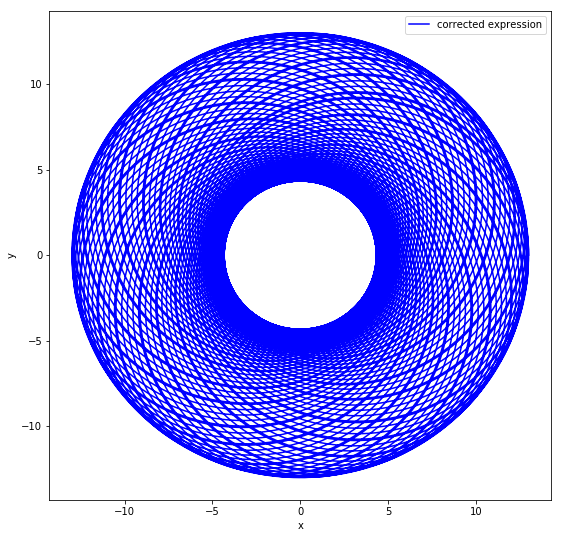

In [235]:
#plot traj


fig = plt.figure()

fig.set_size_inches(9, 9)
#plt.xlim(-20,20)
#plt.ylim(-20,20)
geo1=plt.plot(x,y,'b',label='corrected expression')
#geo2=plt.plot(x2,y2,'y--',label='numerical derivative')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


In [7]:
#算导数(算到三阶导数)

x_t_3dot=[]
y_t_3dot=[]
z_t_3dot=[]

dt=t[1]-t[0]

    
for i in np.arange(index.size):
    if i==0:
        x_t_3dot.append((x_t_2dot[1]-x_t_2dot[0])/dt)
        y_t_3dot.append((y_t_2dot[1]-y_t_2dot[0])/dt)
        z_t_3dot.append((z_t_2dot[1]-z_t_2dot[0])/dt)
    elif i==index[-1]:
        x_t_3dot.append((x_t_2dot[i]-x_t_2dot[i-1])/dt)
        y_t_3dot.append((y_t_2dot[i]-y_t_2dot[i-1])/dt)
        z_t_3dot.append((z_t_2dot[i]-z_t_2dot[i-1])/dt)
    else:    
        x_t_3dot.append(0.5*(x_t_2dot[i+1]-x_t_2dot[i-1])/dt)
        y_t_3dot.append(0.5*(y_t_2dot[i+1]-y_t_2dot[i-1])/dt)
        z_t_3dot.append(0.5*(z_t_2dot[i+1]-z_t_2dot[i-1])/dt)
    



In [236]:
#四极矩算法，在trace-reversed gauge的metric

hbar_xx=[]
hbar_yy=[]
hbar_zz=[]
hbar_xy=[]
hbar_yz=[]
hbar_xz=[]
for i in np.arange(index.size):
    hbar_xx.append(4*(x_t_dot[i]*x_t_dot[i]+x[i]*x_t_2dot[i]))
    hbar_yy.append(4*(y_t_dot[i]*y_t_dot[i]+y[i]*y_t_2dot[i]))
    hbar_zz.append(4*(z_t_dot[i]*z_t_dot[i]+z[i]*z_t_2dot[i]))
    hbar_xy.append(2*(y[i]*x_t_2dot[i]+y_t_2dot[i]*x[i]+2*y_t_dot[i]*x_t_dot[i]))
    hbar_yz.append(2*(y[i]*z_t_2dot[i]+y_t_2dot[i]*z[i]+2*y_t_dot[i]*z_t_dot[i]))
    hbar_xz.append(2*(z[i]*x_t_2dot[i]+z_t_2dot[i]*x[i]+2*z_t_dot[i]*x_t_dot[i]))
    

In [108]:
#八极矩算法，在trace-reversed gauge的metric

Ixx_2dot=[]
Ixx_3dot=[]
Sxxx_2dot=[]
Syxx_2dot=[]
Mxxx_3dot=[]
Myxx_3dot=[]
hbar_xx=[]
for i in np.arange(index.size):
    Ixx_2dot.append(2*(x_t_dot[i]*x_t_dot[i]+x[i]*x_t_2dot[i]))
    Ixx_3dot.append(6*x_t_dot[i]*x_t_2dot[i]   +   2*x[i]*x_t_3dot[i])
    Sxxx_2dot.append( 2  *  x_t_2dot[i]*(2*x[i]*x_t_dot[i])     +    x_t_dot[i]*Ixx_2dot[i]        +   x_t_3dot[i]*x[i]*x[i])
    Syxx_2dot.append( 2  *  y_t_2dot[i]*(2*x[i]*x_t_dot[i])     +    y_t_dot[i]*Ixx_2dot[i]        +   y_t_3dot[i]*x[i]*x[i]  )
    Mxxx_3dot.append( x_t_3dot[i]*x[i]*x[i]  +  3*x_t_2dot[i]* (2*x[i]*x_t_dot[i])  +  3*x_t_dot[i]*Ixx_2dot[i]  +  x[i]*Ixx_3dot[i] )
    Myxx_3dot.append( y_t_3dot[i]*x[i]*x[i]  +  3*y_t_2dot[i]* (2*x[i]*x_t_dot[i])  +  3*y_t_dot[i]*Ixx_2dot[i]  +  y[i]*Ixx_3dot[i] )
    hbar_xx.append( 2* ( Ixx_2dot[i]  -  2*x[i]*Sxxx_2dot[i]/np.sqrt(x[i]*x[i]+y[i]*y[i]+z[i]*z[i])  -  2*y[i]*Syxx_2dot[i]/np.sqrt(x[i]*x[i]+y[i]*y[i]+z[i]*z[i])  +  x[i]*Mxxx_3dot[i]/np.sqrt(x[i]*x[i]+y[i]*y[i]+z[i]*z[i])  +  y[i]*Myxx_3dot[i]/np.sqrt(x[i]*x[i]+y[i]*y[i]+z[i]*z[i]) ) )




Iyy_2dot=[]
Iyy_3dot=[]
Sxyy_2dot=[]
Syyy_2dot=[]
Mxyy_3dot=[]
Myyy_3dot=[]
hbar_yy=[]
for i in np.arange(index.size):
    Iyy_2dot.append(2*(y_t_dot[i]*y_t_dot[i]+y[i]*y_t_2dot[i]))
    Iyy_3dot.append(6*y_t_dot[i]*y_t_2dot[i]   +   2*y[i]*y_t_3dot[i])
    Sxyy_2dot.append( 2  *  x_t_2dot[i]*(2*y[i]*y_t_dot[i])     +    x_t_dot[i]*Iyy_2dot[i]        +   x_t_3dot[i]*y[i]*y[i])
    Syyy_2dot.append( 2  *  y_t_2dot[i]*(2*y[i]*y_t_dot[i])     +    y_t_dot[i]*Iyy_2dot[i]        +   y_t_3dot[i]*y[i]*y[i]  )
    Mxyy_3dot.append( x_t_3dot[i]*y[i]*y[i]  +  3*x_t_2dot[i]* (2*y[i]*y_t_dot[i])  +  3*x_t_dot[i]*Iyy_2dot[i]  +  x[i]*Iyy_3dot[i] )
    Myyy_3dot.append( y_t_3dot[i]*y[i]*y[i]  +  3*y_t_2dot[i]* (2*y[i]*y_t_dot[i])  +  3*y_t_dot[i]*Iyy_2dot[i]  +  y[i]*Iyy_3dot[i] )
    hbar_yy.append( 2* ( Iyy_2dot[i]  -  2*x[i]*Sxyy_2dot[i]/np.sqrt(x[i]*x[i]+y[i]*y[i]+z[i]*z[i])  -  2*y[i]*Syyy_2dot[i]/np.sqrt(x[i]*x[i]+y[i]*y[i]+z[i]*z[i])  +  x[i]*Mxyy_3dot[i]/np.sqrt(x[i]*x[i]+y[i]*y[i]+z[i]*z[i])  +  y[i]*Myyy_3dot[i]/np.sqrt(x[i]*x[i]+y[i]*y[i]+z[i]*z[i]) ) )



In [237]:
#由trace-reversed gauge转换到transverse traceless gauge
PHI=0/180*np.pi  #azimuthal angle, in rad
THETA=45/180*np.pi  #latitude angle, in rad

hTT_TT=[]
hTT_PP=[]
hTT_TP=[]
hTT_plus=[]
hTT_cross=[]

for i in np.arange(index.size):
    
    
    hTT_TT.append( np.cos(THETA)*np.cos(THETA)* (hbar_xx[i]*np.cos(PHI)*np.cos(PHI) + hbar_xy[i]*np.sin(2*PHI) + hbar_yy[i]*np.sin(PHI)*np.sin(PHI) )  +  hbar_zz[i]*np.sin(THETA)*np.sin(THETA)  -  np.sin(2*THETA)* (hbar_xz[i]*np.cos(PHI)+hbar_yz[i]*np.sin(PHI))  )
    hTT_TP.append( np.cos(THETA)* (-0.5*hbar_xx[i]*np.sin(2*PHI) + hbar_xy[i]*np.cos(2*PHI) + 0.5*hbar_yy[i]*np.sin(2*PHI))  +  np.sin(THETA)* (hbar_xz[i]*np.sin(PHI)-hbar_yz[i]*np.cos(PHI)) )
    hTT_PP.append( hbar_xx[i]*np.sin(PHI)*np.sin(PHI)  -  hbar_xy[i]*np.sin(2*PHI)  +  hbar_yy[i]*np.cos(PHI)*np.cos(PHI) )
    hTT_plus.append(0.5*(hTT_TT[i]-hTT_PP[i]))
    hTT_cross.append(hTT_TP[i])


Text(0.5,0,'retarded time')

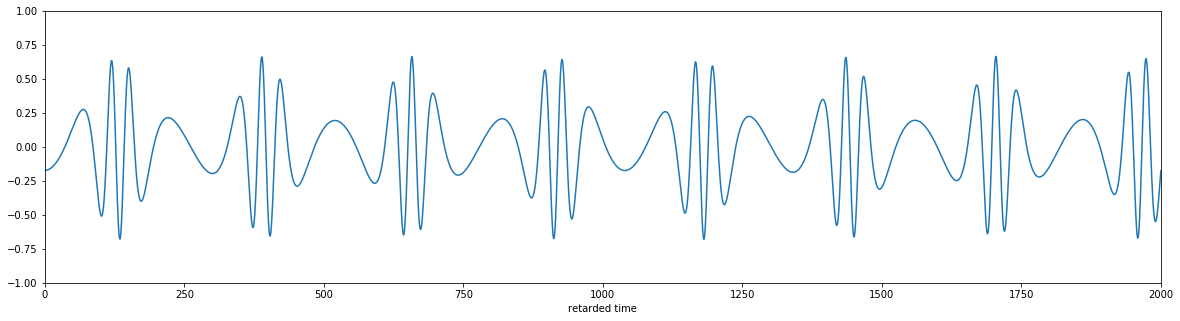

In [238]:
fig=plt.figure()
fig.set_size_inches(20, 5)
plt.xlim(0,2000)
plt.ylim(-1,1)
plt.plot(t,hTT_plus)
plt.xlabel('retarded time')

In [239]:
#注意上面算出来的h还要*mu（mass ratio）/R（观测距离，也以M为单位）才是真的strain
#发现一个小问题，上面定义的数据类型大部分都是list，但是array才比较好用
#还要注意一点几何单位制和SI单位的转换

########转换单位
Grav=6.674e-11 #引力常数
clight=2.998e8 #光速
Msol=1.989e30  #太阳质量，以千克做单位

M=1e6 # clight*clight*clight/Grav/Msol/1 #中心天体质量，以太阳质量为单位

#把时间转换成秒
t_sec=t*M*Msol*Grav/clight/clight/clight
dt=t_sec[1]-t_sec[0]

#把pc距离转换成M为单位
R_pc=5e9  #以pc为单位的观测距离
R=R_pc*3.0857e16*clight*clight/Grav/M/Msol  #以中心天体质量为单位的，长度米与中心天体质量的换算是 1m/kg = clight*clight/G

#小天体的质量
mu=1e-5 #应该是以中心天体质量为单位的

hTT_plus_true=np.array(hTT_plus)*mu/R
hTT_cross_true=np.array(hTT_cross)*mu/R

########用于计算的波形，plus作为实部，cross作为虚部
mytemp=hTT_plus_true+hTT_cross_true[i]

#采样频率
fs=1/dt

#做傅里叶变换，注意要除以采样频率才是真的amplitude
mytemp_fft=np.fft.fft(mytemp)/fs

#变换后的频率序列,注意，只有前一半是正的频率
freq=np.fft.fftfreq(len(mytemp),dt)

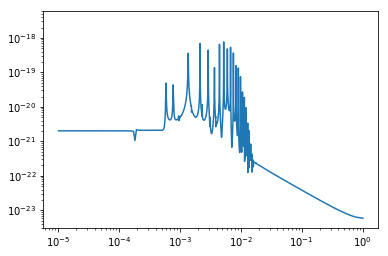

In [240]:
plt.loglog(freq,np.abs(mytemp_fft))

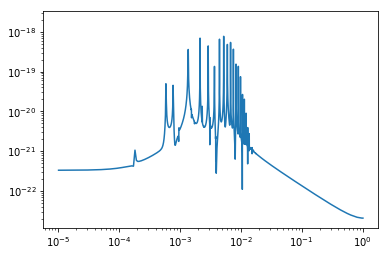

In [232]:
plt.loglog(freq,np.abs(mytemp_fft))

(0.43693642688+0j)


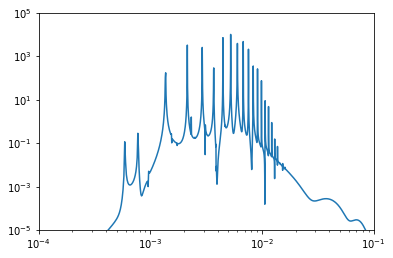

In [216]:
##########LISA noise, reference: https://arxiv.org/abs/gr-qc/0607007v2
u=2*np.pi*freq*50/3 #见reference（36）上面一段
Sn=[]  #LISA noise
for i in np.arange(freq.size/2):
    i=int(i)
    if i==0:
        Sn.append(1e10)
    elif(u[i]<0.25):
        Sn.append(8.08e-48/((2*np.pi*freq[i])**4) +5.52e-41 )
    else :
        Sn.append( (2.88e-48/((2*np.pi*freq[i])**4) +5.52e-41 ) *u[i]*u[i]/ ( (1+cos(u[i])*cos(u[i]) )*(1.0/3.0-2.0/u[i]/u[i]) + sin(u[i])**2 + 4*sin(u[i])*cos(u[i])/(u[i]**3) ) )


###########SNR
SNR=0
SNspec=[]
df=freq[1]-freq[0]
for i in np.arange(freq.size/2):
    i=int(i)
    SNspec.append(( mytemp_fft[i]*np.conjugate(mytemp_fft[i]) + np.conjugate(mytemp_fft[i])*mytemp_fft[i])/(Sn[i]))
    SNR=SNR+SNspec[i]*df

plt.loglog(freq[np.arange(int(freq.size/2))],np.abs(SNspec))
plt.xlim(1e-4,1e-1)
plt.ylim(1e-5,1e5)
print(SNR)

In [ ]:
print(t_sec[200001]/3600/24)

In [ ]:
#将Kerr与非kerr的GW做MF


1.14036669377


In [91]:
#算导数(旧的，纯从t,x,y,z序列算到三阶导数)
x_tau_dot=[]
vx_tau_dot=[]
ax_tau_dot=[]
x_t_dot=[]
x_t_2dot=[]
x_t_3dot=[]
t_tau_dot=[]
dtau=tau[1]-tau[0]

for i in np.arange(index.size):
    if i==0:
        x_tau_dot.append((x[1]-x[0])/dtau)
        t_tau_dot.append((t[1]-t[0])/dtau)
    elif i==index[-1]:
        x_tau_dot.append((x[i]-x[i-1])/dtau)
        t_tau_dot.append((t[i]-t[i-1])/dtau)
    else:    
        x_tau_dot.append(0.5*(x[i+1]-x[i-1])/dtau)
        t_tau_dot.append(0.5*(t[i+1]-t[i-1])/dtau)
    x_t_dot.append(x_tau_dot[i]/t_tau_dot[i])
    
for i in np.arange(index.size):
    if i==0:
        vx_tau_dot.append((x_t_dot[1]-x_t_dot[0])/dtau)
    elif i==index[-1]:
        vx_tau_dot.append((x_t_dot[i]-x_t_dot[i-1])/dtau)
    else:    
        vx_tau_dot.append(0.5*(x_t_dot[i+1]-x_t_dot[i-1])/dtau)
    x_t_2dot.append(vx_tau_dot[i]/t_tau_dot[i])
    
for i in np.arange(index.size):
    if i==0:
        ax_tau_dot.append((x_t_2dot[1]-x_t_2dot[0])/dtau)
    elif i==index[-1]:
        ax_tau_dot.append((x_t_2dot[i]-x_t_2dot[i-1])/dtau)
    else:    
        ax_tau_dot.append(0.5*(x_t_2dot[i+1]-x_t_2dot[i-1])/dtau)
    x_t_3dot.append(ax_tau_dot[i]/t_tau_dot[i])
    
y_tau_dot=[]
vy_tau_dot=[]
ay_tau_dot=[]
y_t_dot=[]
y_t_2dot=[]
y_t_3dot=[]
t_tau_dot=[]
dtau=tau[1]-tau[0]

for i in np.arange(index.size):
    if i==0:
        y_tau_dot.append((y[1]-y[0])/dtau)
        t_tau_dot.append((t[1]-t[0])/dtau)
    elif i==index[-1]:
        y_tau_dot.append((y[i]-y[i-1])/dtau)
        t_tau_dot.append((t[i]-t[i-1])/dtau)
    else:    
        y_tau_dot.append(0.5*(y[i+1]-y[i-1])/dtau)
        t_tau_dot.append(0.5*(t[i+1]-t[i-1])/dtau)
    y_t_dot.append(y_tau_dot[i]/t_tau_dot[i])
    
for i in np.arange(index.size):
    if i==0:
        vy_tau_dot.append((y_t_dot[1]-y_t_dot[0])/dtau)
    elif i==index[-1]:
        vy_tau_dot.append((y_t_dot[i]-y_t_dot[i-1])/dtau)
    else:    
        vy_tau_dot.append(0.5*(y_t_dot[i+1]-y_t_dot[i-1])/dtau)
    y_t_2dot.append(vy_tau_dot[i]/t_tau_dot[i])
    
for i in np.arange(index.size):
    if i==0:
        ay_tau_dot.append((y_t_2dot[1]-y_t_2dot[0])/dtau)
    elif i==index[-1]:
        ay_tau_dot.append((y_t_2dot[i]-y_t_2dot[i-1])/dtau)
    else:    
        ay_tau_dot.append(0.5*(y_t_2dot[i+1]-y_t_2dot[i-1])/dtau)
    y_t_3dot.append(ay_tau_dot[i]/t_tau_dot[i])
    

z_tau_dot=[]
vz_tau_dot=[]
az_tau_dot=[]
z_t_dot=[]
z_t_2dot=[]
z_t_3dot=[]
t_tau_dot=[]
dtau=tau[1]-tau[0]

for i in np.arange(index.size):
    if i==0:
        z_tau_dot.append((z[1]-z[0])/dtau)
        t_tau_dot.append((t[1]-t[0])/dtau)
    elif i==index[-1]:
        z_tau_dot.append((z[i]-z[i-1])/dtau)
        t_tau_dot.append((t[i]-t[i-1])/dtau)
    else:    
        z_tau_dot.append(0.5*(z[i+1]-z[i-1])/dtau)
        t_tau_dot.append(0.5*(t[i+1]-t[i-1])/dtau)
    z_t_dot.append(z_tau_dot[i]/t_tau_dot[i])
    
for i in np.arange(index.size):
    if i==0:
        vz_tau_dot.append((z_t_dot[1]-z_t_dot[0])/dtau)
    elif i==index[-1]:
        vz_tau_dot.append((z_t_dot[i]-z_t_dot[i-1])/dtau)
    else:    
        vz_tau_dot.append(0.5*(z_t_dot[i+1]-z_t_dot[i-1])/dtau)
    z_t_2dot.append(vz_tau_dot[i]/t_tau_dot[i])
    
for i in np.arange(index.size):
    if i==0:
        az_tau_dot.append((z_t_2dot[1]-z_t_2dot[0])/dtau)
    elif i==index[-1]:
        az_tau_dot.append((z_t_2dot[i]-z_t_2dot[i-1])/dtau)
    else:    
        az_tau_dot.append(0.5*(z_t_2dot[i+1]-z_t_2dot[i-1])/dtau)
    z_t_3dot.append(az_tau_dot[i]/t_tau_dot[i])
    
    

In [87]:
#算导数(一改，从t,x,y,z,和四速度序列算到三阶导数)

vx_tau_dot=[]
ax_tau_dot=[]
x_t_2dot=[]
x_t_3dot=[]

vy_tau_dot=[]
ay_tau_dot=[]
y_t_2dot=[]
y_t_3dot=[]


vz_tau_dot=[]
az_tau_dot=[]
z_t_2dot=[]
z_t_3dot=[]

dtau=tau[1]-tau[0]

   
for i in np.arange(index.size):
    if i==0:
        vx_tau_dot.append((x_t_dot[1]-x_t_dot[0])/dtau)
        vy_tau_dot.append((y_t_dot[1]-y_t_dot[0])/dtau)
        vz_tau_dot.append((z_t_dot[1]-z_t_dot[0])/dtau)
    elif i==index[-1]:
        vx_tau_dot.append((x_t_dot[i]-x_t_dot[i-1])/dtau)
        vy_tau_dot.append((y_t_dot[i]-y_t_dot[i-1])/dtau)
        vz_tau_dot.append((z_t_dot[i]-z_t_dot[i-1])/dtau)
    else:    
        vx_tau_dot.append(0.5*(x_t_dot[i+1]-x_t_dot[i-1])/dtau)
        vy_tau_dot.append(0.5*(y_t_dot[i+1]-y_t_dot[i-1])/dtau)
        vz_tau_dot.append(0.5*(z_t_dot[i+1]-z_t_dot[i-1])/dtau)
    x_t_2dot.append(vx_tau_dot[i]/t_tau_dot[i])
    y_t_2dot.append(vy_tau_dot[i]/t_tau_dot[i])
    z_t_2dot.append(vz_tau_dot[i]/t_tau_dot[i])
    
for i in np.arange(index.size):
    if i==0:
        ax_tau_dot.append((x_t_2dot[1]-x_t_2dot[0])/dtau)
        ay_tau_dot.append((y_t_2dot[1]-y_t_2dot[0])/dtau)
        az_tau_dot.append((z_t_2dot[1]-z_t_2dot[0])/dtau)
    elif i==index[-1]:
        ax_tau_dot.append((x_t_2dot[i]-x_t_2dot[i-1])/dtau)
        ay_tau_dot.append((y_t_2dot[i]-y_t_2dot[i-1])/dtau)
        az_tau_dot.append((z_t_2dot[i]-z_t_2dot[i-1])/dtau)
    else:    
        ax_tau_dot.append(0.5*(x_t_2dot[i+1]-x_t_2dot[i-1])/dtau)
        ay_tau_dot.append(0.5*(y_t_2dot[i+1]-y_t_2dot[i-1])/dtau)
        az_tau_dot.append(0.5*(z_t_2dot[i+1]-z_t_2dot[i-1])/dtau)
    x_t_3dot.append(ax_tau_dot[i]/t_tau_dot[i])
    y_t_3dot.append(ay_tau_dot[i]/t_tau_dot[i])
    z_t_3dot.append(az_tau_dot[i]/t_tau_dot[i])
    



Text(0.5,0,'retarded time')

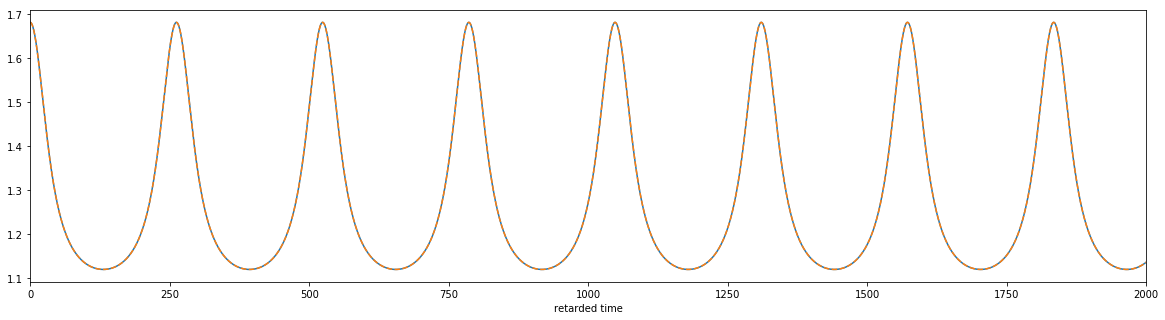

In [64]:


fig=plt.figure()
fig.set_size_inches(20, 5)
plt.xlim(0,2000)
#plt.ylim(-1,1)
plt.plot(t,t_tau_dot)
plt.plot(t_dt,t_tau_dot_dt,'--')
plt.xlabel('retarded time')

In [ ]:
fig=plt.figure()
fig.set_size_inches(20, 5)
plt.xlim(0,2000)
plt.ylim(-1,1)
plt.plot(t,hTT_cross)
plt.xlabel('retarded time')

In [68]:
t_dt=t
x_dt=x;
y_dt=y;
z_dt=z;
F_r_dt=F_r
F_t_dt=F_t
F_th_dt=F_th
F_phi_dt=F_phi
t_tau_dot_dt=t_tau_dot
z_tau_dot_dt=z_tau_dot
y_tau_dot_dt=y_tau_dot
x_tau_dot_dt=x_tau_dot

z_t_dot_dt=z_t_dot
x_t_dot_dt=x_t_dot
y_t_dot_dt=y_t_dot

vr_tau_dot_dt=vr_tau_dot
vth_tau_dot_dt=vth_tau_dot
vphi_tau_dot_dt=vphi_tau_dot
vx_tau_dot_dt=vx_tau_dot
vy_tau_dot_dt=vy_tau_dot
vz_tau_dot_dt=vz_tau_dot

x_t_2dot_dt=x_t_2dot
y_t_2dot_dt=y_t_2dot
z_t_2dot_dt=z_t_2dot

In [ ]:
#算导数(等tau采样，算到三阶导数)

ax_tau_dot=[]
x_t_3dot=[]
ay_tau_dot=[]
y_t_3dot=[]
az_tau_dot=[]
z_t_3dot=[]

dtau=tau[1]-tau[0]

    
for i in np.arange(index.size):
    if i==0:
        ax_tau_dot.append((x_t_2dot[1]-x_t_2dot[0])/dtau)
        ay_tau_dot.append((y_t_2dot[1]-y_t_2dot[0])/dtau)
        az_tau_dot.append((z_t_2dot[1]-z_t_2dot[0])/dtau)
    elif i==index[-1]:
        ax_tau_dot.append((x_t_2dot[i]-x_t_2dot[i-1])/dtau)
        ay_tau_dot.append((y_t_2dot[i]-y_t_2dot[i-1])/dtau)
        az_tau_dot.append((z_t_2dot[i]-z_t_2dot[i-1])/dtau)
    else:    
        ax_tau_dot.append(0.5*(x_t_2dot[i+1]-x_t_2dot[i-1])/dtau)
        ay_tau_dot.append(0.5*(y_t_2dot[i+1]-y_t_2dot[i-1])/dtau)
        az_tau_dot.append(0.5*(z_t_2dot[i+1]-z_t_2dot[i-1])/dtau)
    x_t_3dot.append(ax_tau_dot[i]/t_tau_dot[i])
    y_t_3dot.append(ay_tau_dot[i]/t_tau_dot[i])
    z_t_3dot.append(az_tau_dot[i]/t_tau_dot[i])
    

